In [151]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [98]:
X,y = load_digits().data, load_digits().target

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [100]:
X[7].reshape(-1,8)

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

In [101]:
y[7]

np.int64(7)

In [102]:
import matplotlib.pyplot as plt

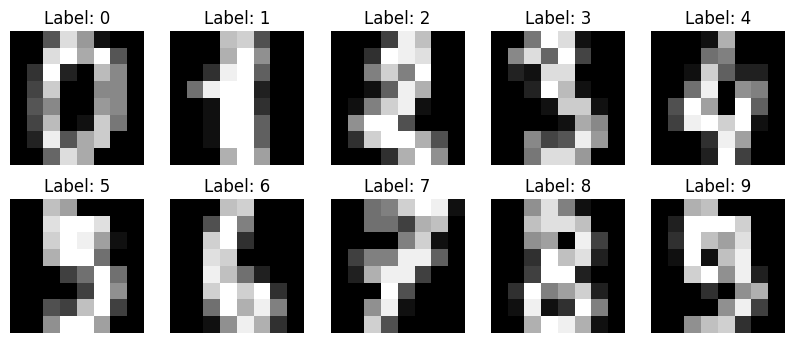

In [103]:
fig,axes = plt.subplots(2,5, figsize=(10,4))
for ax, img, label in zip(axes.ravel(), load_digits().images[:10], y[:10]):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")  # 이미지의 정답 라벨
    ax.axis('off')  # 축 제거

In [87]:
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = SVC(probability=True, random_state=42)


In [88]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('dt', model2),
        ('svc', model3)
    ],
    voting='soft'
)

In [91]:
voting_clf.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [92]:
voting_clf.score(X_test, y_test)

0.9722222222222222

In [94]:
voting_clf.predict_proba(X_test)[:5]

array([[1.49380456e-03, 5.15575090e-04, 3.83370855e-04, 4.08070751e-04,
        9.43995536e-04, 9.87516177e-04, 9.92081263e-01, 4.02240941e-04,
        1.79585302e-03, 9.88310430e-04],
       [4.84217913e-04, 1.43567145e-04, 2.08456205e-04, 1.22048106e-03,
        7.55350923e-04, 1.22367947e-02, 1.62171200e-04, 2.80793972e-04,
        6.32895347e-04, 9.83875272e-01],
       [7.88231021e-05, 4.96223303e-05, 9.52933677e-05, 9.98904698e-01,
        9.13177353e-05, 1.85608573e-04, 1.04971348e-04, 9.48395307e-05,
        1.99298593e-04, 1.95527183e-04],
       [9.76178097e-04, 8.31677549e-04, 1.24260506e-03, 1.60713352e-03,
        1.79847759e-03, 3.42659808e-03, 5.23291164e-04, 9.76102790e-01,
        2.18887923e-03, 1.13023699e-02],
       [1.39299843e-03, 1.68716194e-03, 9.56522358e-01, 2.26601335e-02,
        6.13701236e-04, 2.39513254e-03, 3.04522478e-03, 1.29198117e-03,
        7.29484881e-03, 3.09645927e-03]])

In [96]:
y_test[:5]

array([6, 9, 3, 7, 2])

In [111]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)

In [112]:
lr.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [113]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [114]:
svc.fit(X_train, y_train) 

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [115]:
lr.score(X_test, y_test)

0.9694444444444444

In [116]:
dt.score(X_test, y_test)

0.8416666666666667

In [117]:

svc.score(X_test, y_test)

0.9861111111111112

In [139]:
bc = BaggingClassifier(estimator=SVC(), n_estimators=100)

In [140]:
bc.fit(X_train, y_train)

,estimator,SVC()
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [141]:
bc.score(X_test, y_test)

0.9916666666666667

In [142]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [143]:
rf.score(X_test, y_test)

0.9694444444444444

# with weights

In [144]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('dt', model2),
        ('svc', model3)
    ],
    voting='soft',
    weights=[1,1,3]
)

In [145]:
voting_clf.fit(X_train, y_train)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'soft'
,weights,"[1, 1, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [146]:
voting_clf.score(X_test, y_test)

0.9805555555555555

In [147]:
y_prd = voting_clf.predict(X_test)

In [150]:
y_prd[:5]

array([6, 9, 3, 7, 2])

In [149]:
y_test[:5]

array([6, 9, 3, 7, 2])

In [152]:
from sklearn.ensemble import StackingClassifier

In [156]:
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
     ]

meta_model = LogisticRegression(max_iter=1000, random_state=42)

In [160]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator= meta_model,cv=5)

In [161]:
stacking_clf.fit(X_train, y_train)  

,estimators,"[('dt', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [162]:
stacking_clf.score(X_test, y_test)

0.9861111111111112

# Grid Search

In [165]:
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
     ]

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator= LogisticRegression(max_iter=1000, random_state=42)
)

In [179]:
param_grid = {
    'dt__max_depth': [3,5,7],
    'rf__max_depth': [5, 1],
    'rf__n_estimators': [50, 100],
    'svc__C':[0.1,1,10],
    'cv':[3,5],
    'passthrough':[True, False],
    'final_estimator__C':[0.1,1,10]
}

In [180]:
gs = GridSearchCV(
    stacking_clf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
)

In [181]:
gs.fit(X_train, y_train)

,estimator,StackingClass...dom_state=42))
,param_grid,"{'cv': [3, 5], 'dt__max_depth': [3, 5, ...], 'final_estimator__C': [0.1, 1, ...], 'passthrough': [True, False], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [182]:
gs.score(X_test, y_test)

0.9888888888888889

In [183]:
gs.best_params_

{'cv': 3,
 'dt__max_depth': 3,
 'final_estimator__C': 1,
 'passthrough': False,
 'rf__max_depth': 5,
 'rf__n_estimators': 100,
 'svc__C': 10}